In [1]:
#%%
import numpy as np
import sys
sys.path.append(r"C:\Users\alasm\Masteroppgave\w3tp")
import w3t
#import os
import h5py
from matplotlib import pyplot as plt
import time
import os
import pandas as pd

 
tic = time.perf_counter()
plt.close("all")

In [2]:
section_height = 0.0667
section_width = 0.365
section_length_1 = 2.68

In [3]:
section_name = "Single_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments
h5_file = os.path.join(h5_input_path, section_name)
f = h5py.File((h5_file + ".hdf5"), "r")

data_set_groups = list(f)
print(data_set_groups)

exps = np.array([])

for data_set_group in data_set_groups:
    exps = np.append(exps,w3t.Experiment.fromWTT(f[data_set_group]))

tests_with_equal_motion = w3t.group_motions(exps)
print(tests_with_equal_motion)


['HAR_INT_SINGLE_03_01_000', 'HAR_INT_SINGLE_03_01_001', 'HAR_INT_SINGLE_03_01_002', 'HAR_INT_SINGLE_03_02_000', 'HAR_INT_SINGLE_03_02_001', 'HAR_INT_SINGLE_03_02_002', 'HAR_INT_SINGLE_04_01_002', 'HAR_INT_SINGLE_04_01_003', 'HAR_INT_SINGLE_04_01_004', 'HAR_INT_SINGLE_04_01_005', 'HAR_INT_SINGLE_04_02_000', 'HAR_INT_SINGLE_04_02_001', 'HAR_INT_SINGLE_04_02_002', 'HAR_INT_SINGLE_04_02_003']
[array([0, 1, 2], dtype=int64), array([3, 4, 5], dtype=int64), array([6, 7, 8, 9], dtype=int64), array([10, 11, 12, 13], dtype=int64)]


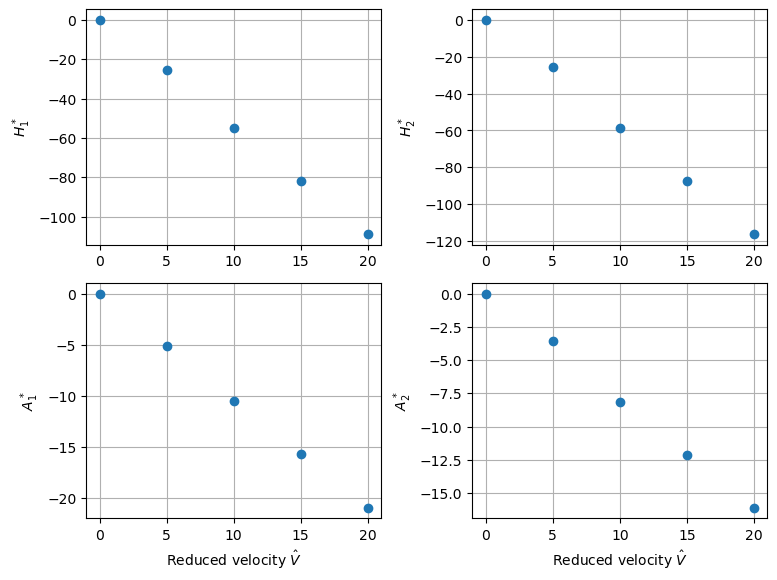

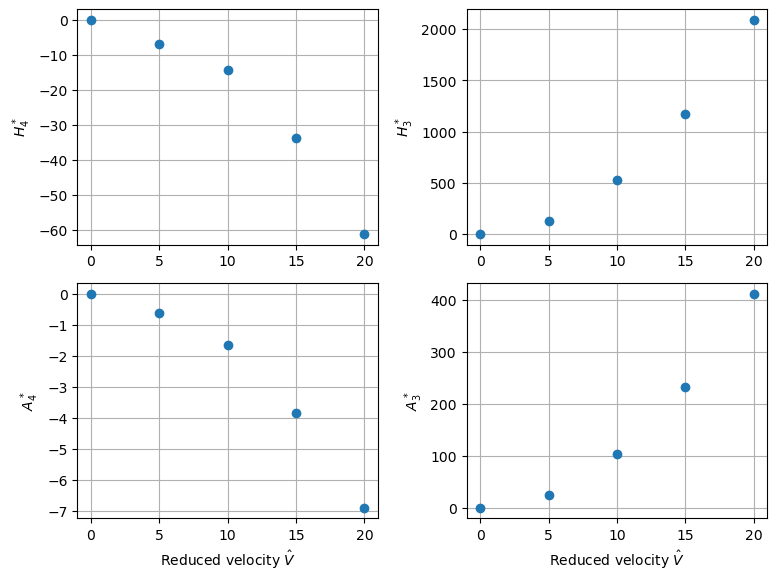

In [6]:
ads_list = []
val_list = []
expf_list = []

fig_damping, _ = plt.subplots(2,2)
fig_stiffness, _ = plt.subplots(2,2)

all_ads = w3t.AerodynamicDerivatives2x2()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion[k1])-1):
        exp0 = exps[tests_with_equal_motion[k1][0]]
        exp1 = exps[tests_with_equal_motion[k1][k2+1]]
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)

        #print("Experiment " + str(tests_with_equal_motion[k1][0]))
        #print(exp0.motion_type())
        
        ads, val, expf = w3t.AerodynamicDerivatives2x2.fromWTT(exp0,exp1,section_width,section_length_1)
        ads_list.append(ads)
        val_list.append(val)
        expf_list.append(expf)
        all_ads.append(ads)   
        
        # plot measurements and predictions by ads
        #fig, _ = plt.subplots(4,2,sharex=True)
        #expf.plot_experiment(fig=fig)
        #val.plot_experiment(fig=fig)

        #ads.plot(fig_damping = fig_damping, fig_stiffness=fig_stiffness, mode='velocity')


#all_ads.plot(fig_damping = fig_damping, fig_stiffness=fig_stiffness, mode='total+poly', orders = np.ones(8,dtype=int)*2)

# all_ads.plot(fig_damping = fig_damping, fig_stiffness=fig_stiffness)

# file_path = ".\\Plots_AD\\"
# damping_path = os.path.join(file_path, 'AD_Single_damping.png')
# fig_damping.savefig(damping_path, bbox_inches="tight")
# stiffness_path = os.path.join(file_path, 'AD_Single_stiffness.png')
# fig_stiffness.savefig(stiffness_path, bbox_inches="tight")
#plt.show()

poly_coeff, k_range = all_ads.fit_poly_k()
vred_new = np.linspace(0, 20, 5)
all_ads_new = all_ads.from_poly_k(poly_coeff, k_range, vred_new)

all_ads_new.plot(fig_damping = fig_damping, fig_stiffness=fig_stiffness)



In [5]:
poly_coeff, v_range = all_ads.fit_poly(orders = np.ones(8,dtype=int)*2)
print(poly_coeff, v_range)


[[-0.15921022 -4.68060373  2.41535371]
 [-0.28841473 -4.68223327  6.14458237]
 [ 5.85664218 -4.74740802  1.87160102]
 [ 0.14705105 -2.233175    0.22667219]
 [-0.01885119 -0.95244873  0.1706373 ]
 [-0.06018517 -0.48845418  0.54570604]
 [ 1.1044647  -0.5419098   0.28653454]
 [ 0.01478124 -0.24889623  0.25457415]] [[1.00612386 7.07378234]
 [1.00612386 7.07378234]
 [1.00612386 7.07378234]
 [1.00612386 7.07378234]
 [1.00612386 7.07378234]
 [1.00612386 7.07378234]
 [1.00612386 7.07378234]
 [1.00612386 7.07378234]]
